# Explorative Analyse der Daten des Herzoglich=Sachsen=Gotha= und Altenburgischen Hof= und Adreß=Calenders und darüber hinaus

Zurück zur deskriptiven Analyse -> 

## Anleitung

Das Kapitel der Potentialanalyse der Masterarbeit «Vom Hof= und Adreßcalender zum Datensatz» wird durch mehrere Data Science Notebooks – wie das vorliegende – ergänzt. Diese Notebooks visualisieren Teile der erfassten Datensätze und reichert sie durch zusätzliche Informationen an. Da mit größeren Datenmengen und immer mit den tatsächlichen Daten gearbeitet, können die Abfragen und Visualisierungen mitunter ein wenig Zeit in Anspruch nehmen. Navigiert werden kann über das Inhaltsverzeichnis ☰ in der linken oberen Ecke. Der gesamte Code der Skripte  findet sich hier: s-mamitz/MA-Mast. 

> Technischer Hinweis: In der Regel werden zunächst zwischengespeicherte Analyseergebnisse angezeigt. Um Graphen mit den aktuellsten Daten zu erhalten, müssen die Skripte über den Button oben rechts mit «▸ Run» ausgeführt werden. Unter Umständen muss dies wiederholt werden, wenn die Fehlermeldung erscheint, dass die Maschine noch nicht gestartet ist. Im Folgenden wird Abfrage für Abfrage ausgeführt und visualisiert. Die Visualisierungen können teilweise durch eigene Eingaben manipuliert werden. 

> Hinweis: Die hier gezeigten Visualisierungen sind nur Werkzeuge und kein authentisches Abbild der (historischen) Wirklichkeit. Auch sie sind einer (digitalen) Quellenkritik zu unterziehen. Die vorliegenden Daten wurden in diesem Sinne mehrfach modelliert: Zunächst zeitgenössisch als Datensätze des Amtskalenders, dann als Datentripel für eine Graphdatenbank (FactGrid) und schließlich aggregiert als Visualisierung. Daten aus anderen Projekten werden hinzugezogen; ihre Integrität ist zu prüfen.

## Einführung

Als Weiterführung paradigmatischer Aspekte der deskriptiven Analyse versammelte dieses Notebook Ideen und erste Umsetzungsansätze für Forschungsfragen und -lösungen mit dem Werkzeug FactGrid als exemplarischen Vertreter einer Graphdatenbank. 

## Organisationsstruktur des Herzogtums Sachsen-Gotha-Altenburg und seiner Einrichtungen

Für ein provisorisches Organigramm der Herzogtümer Sachsen-Gotha und Sachsen-Altenburg sowie des Hofstaates auf Schloss Friedenstein in Gotha auf Grundlage der Daten des Kalenders und vorerst ohne Hinzuziehung weiterer Quellen wird auf das ursprünglich für Wikidata entwickelte Tool FactGrid Graphbuilder zurückgegriffen. Die Plattform wurde vom Autor der vorliegenden Studien für FactGrid adaptiert. 

- Ursprünglicher Code für Wikidata: AngryLoki/wikidata-gaphbuilder

- Fork des respository an Adaption für FactGrid: vonMitzscha/wikidata-graphbuilder

- Adresse des Tools: https://factgrid-graphbuilder.netlify.app/

Für die Darstellung der Daten als Organigramm wird provisorisch auf die derzeit noch vornehmlich nach den Amtskalendern erstellte Hierarchie der Behörden und Abteilungen über die property «Nächsthöhere Hierarchiebene» [P428] zurückgegriffen. Als Ausgangs-item fungiert das Herzogtum Sachsen-Gotha-Altenburg [Q40154]. Den Status als Provisorium unterstreich nicht nur die durchaus als kritisch zu betrachtende Modellierung anhand der Behördenlisten, sondern auch der Umstand, dass es sich nicht um ein dynamisches Netzwerk handelt, welches für einen bestimmten Zeitpunkt die Organisationsstruktur ausgeben kann. Denn durchaus verändert sich das Organisationsgefüge; derzeit sind entsprechende Veränderungen durch mehrere Kanten zwischen betreffenden Knoten/Organisationen ersichtlich. 

> Link zur externen Visualisierung: FactGrid Graphbuilder, für item [Q40154], traversal property [P428], mode: reverse, graph-direction: left. Die generierte Ansicht kann gezoomt und gehovert werden. Der Link ist persistent bzw. speichert die Einstellungen. 

## Der Staat und Hof in Zahlen

### Die Zahl der Beschäftigten

Widmeten sich die bisherigen Analysen vornehmlich innovativen oder komplexen Fragestellungen ist durchaus auch möglich, was bisher Schwerpunkt der Forschung zu Hof- und Staatsorganisation im 18. Jahrhundert war. So zum Beispiel der ganz grundlegende statistische Überblick über die Entwicklung der Zahl Funktionsträger einer Abteilung, eines Hofes oder eines Etats. Liegen die Daten der Amtsträger, deren Beschäftigungsdauer und der Ort der Beschäftigung verknüpft vor, ist die Ausspielung der Daten ein einfaches. Zusätzlich wird das Vorhaben dadurch begünstig, dass auch die Behörden und deren Abteilungen strukturiert und hierarchisiert vorliegen und so mit wenigen Mitteln größeren Gruppen betrachtet werden können. 

Für die folgenden Darstellungen werden zunächst von der Auswahl eines Etats ausgehend alle in nächster Ebene unter diesem Etat gelistete Behörden und Einrichtungen gesammelt und für das zweite Dropdown-Menü zur Verfügung gestellt. Die getroffene Auswahl schlägt sich dann in der SparQL-Abfrage im Hintergrund nieder und gibt alle Personen die in Behörden, Einrichtungen oder Abteilungen, die der gewählten Institution laut Amtskalender unterstellt waren sowie deren Anstellungsdauer wieder. 

Auf dieser Datengrundlage wird der Verlaufsgraph erstellt. Da die Daten nicht auf Daten aus dem vorliegenden Projekt beschränkt sind, wurde der Projektzeitraum im Liniengraph durch einen grauen Hintergrund gekennzeichnet. Zudem wurde der Regierungswechsel von Friedrich III. auf Ernst II. von Sachsen-Gotha-Altenburg als Interpretationshilfe kenntlich gemacht.

> Technischer Hinweis: Wird der Etat gewechselt, kann es sein, dass zunächst ein Fehler angezeigt wird, da das zweite Dropdown-Menü für die Einzelbehörden noch die alten Daten weitergab. In diesem Fall einfach aus dem zweiten Dropdownmenü eine neue Behörde auswählen. 

🄴 Auswahl des zu analysierenden Etats

In [21]:
input_2 = 'Ziviletat Herzogtum Sachsen-Gotha (Q506750)'

In [22]:
import requests
import pandas as pd
import plotly.express as px
from SPARQLWrapper import SPARQLWrapper, JSON
import re  # Für das Extrahieren der ID aus dem Input

def fetch_oberbehoerden_data(input_2):
    # Extrahieren der ID aus dem Format "Ziviletat (Q1234)"
    match = re.search(r"\(Q(\d+)\)", input_2)
    if match:
        qid = "Q" + match.group(1)  # Extrahierte ID in der Form "Q1234"
    else:
        raise ValueError("Ungültiges Format. Es wurde keine gültige QID gefunden.")
    
    # SPARQL Endpoint
    ENDPOINT = "https://database.factgrid.de/sparql"

    # Funktion zur SPARQL-Abfrage
    def sparql_query(query):
        sparql = SPARQLWrapper(ENDPOINT)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        results = sparql.query().convert()
        return results["results"]["bindings"]

    # Abfrage: Oberbehörden mit der dynamischen QID
    query_oberbehoerden = f"""
    SELECT ?item ?itemLabel ?linkTo {{
    SERVICE gas:service {{
        gas:program gas:gasClass "com.bigdata.rdf.graph.analytics.SSSP" ;
                    gas:in wd:{qid} ;
                    gas:traversalDirection "Reverse" ;
                    gas:out ?item ;
                    gas:out1 ?depth ;
                    gas:maxIterations 1 ;
                    gas:linkType wdt:P428 .
      }}
    OPTIONAL {{ ?item wdt:P428 ?linkTo }}
    SERVICE wikibase:label {{bd:serviceParam wikibase:language "de,en" }}
    }}
    """
    
    # Daten abfragen
    oberbehoerden_data = sparql_query(query_oberbehoerden)

    # DataFrame erstellen
    df_oberbehoerden = pd.DataFrame([{  
        "Oberbehörde": o["item"]["value"],
        "OberbehördeLabel": o["itemLabel"]["value"]
    } for o in oberbehoerden_data]).sort_values("OberbehördeLabel")

    # Liste für das Deepnote-Dropdown
    oberbehoerden_liste = df_oberbehoerden["OberbehördeLabel"].tolist()

    # Ausgabe für das Dropdown-Menü
    return oberbehoerden_liste

# Funktion aufrufen
oberbehoerden_liste = fetch_oberbehoerden_data(input_2)

# Diese Liste wird nun für das Dropdown-Menü in Deepnote verwendet.
print("Dropdown-Menü für Etat initiiert")
#print(oberbehoerden_liste)

Dropdown-Menü für Etat initiiert


> Kommentar: Es kann in der Liste neben den Behörden erster Ordnung auch der Etat selber ausgewählt werden, um einen Gesamtüberblick zu erhalten. 

🄴 Auswahl einer zum gewählten Etat gehörenden Behörde (für diese wird die Analyse erstellt)

In [25]:
input_1 = 'Herzogliches Amt Gotha'

In [4]:
import requests
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.display import display, HTML
import re

def fetch_oberbehoerden_data(input_2):
    match = re.search(r'\(Q(\d+)\)', input_2)
    if not match:
        raise ValueError("No QID found in input string")
    qid = "Q" + match.group(1)
    
    ENDPOINT = "https://database.factgrid.de/sparql"
    
    def sparql_query(query):
        sparql = SPARQLWrapper(ENDPOINT)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        results = sparql.query().convert()
        return results["results"]["bindings"]
    
    query_oberbehoerden = f"""
    SELECT ?item ?itemLabel ?linkTo {{
    SERVICE gas:service {{
        gas:program gas:gasClass "com.bigdata.rdf.graph.analytics.SSSP" ;
                    gas:in wd:{qid} ;
                    gas:traversalDirection "Reverse" ;
                    gas:out ?item ;
                    gas:out1 ?depth ;
                    gas:maxIterations 1 ;
                    gas:linkType wdt:P428 .
      }}
    OPTIONAL {{ ?item wdt:P428 ?linkTo }}
    SERVICE wikibase:label {{bd:serviceParam wikibase:language "de,en" }}
    }}
    """
    
    oberbehoerden_data = sparql_query(query_oberbehoerden)
    
    df_oberbehoerden = pd.DataFrame([{  
        "Oberbehörde": o["item"]["value"],
        "OberbehördeLabel": o["itemLabel"]["value"]
    } for o in oberbehoerden_data]).sort_values("OberbehördeLabel")
    
    return df_oberbehoerden

def visualize_employment(input_1, df_oberbehoerden):
    ENDPOINT = "https://database.factgrid.de/sparql"
    
    def sparql_query(query):
        sparql = SPARQLWrapper(ENDPOINT)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        results = sparql.query().convert()
        return results["results"]["bindings"]
    
    gewaehlte_oberbehoerde = input_1
    
    try:
        oberbehoerde_qid = df_oberbehoerden[df_oberbehoerden["OberbehördeLabel"] == gewaehlte_oberbehoerde]["Oberbehörde"].values[0].split("/")[-1]
        #print(f"Ermittelte Q-ID der Oberbehörde: {oberbehoerde_qid}")
    except IndexError:
        print(f"Fehler: Keine Q-ID für '{gewaehlte_oberbehoerde}' gefunden!")
        return
    
    query_personen = f"""
    SELECT DISTINCT ?person ?orga ?orgaLabel (YEAR(?startDate) AS ?StartJahr) (YEAR(?endDate) AS ?EndJahr) WHERE {{
      ?orga (wdt:P428)* wd:{oberbehoerde_qid}.
      
      ?person wdt:P124 ?calendar. 
      ?calendar p:P441 ?refStatement.
      ?refStatement ps:P441 wd:Q76826.
      
      ?person p:P315 ?refStatement2.
      ?refStatement2 ps:P315 ?orga. 
      ?refStatement2 (pq:P49|pq:P290) ?startDate.
      OPTIONAL {{ ?refStatement2 (pq:P50|pq:P291) ?endDate. }}
      
      SERVICE wikibase:label {{ bd:serviceParam wikibase:language "de". }}
    }} 
    ORDER BY ?StartJahr ?EndJahr ?orgaLabel
    """
    
    person_data = sparql_query(query_personen)
    #print(f"Anzahl der gefundenen Personen-Datensätze: {len(person_data)}")
    
    if not person_data:
        print(f"Keine Daten für {gewaehlte_oberbehoerde} gefunden.")
        return
    
    df_persons = pd.DataFrame([{  
        "Person": p["person"]["value"],
        "Arbeitsstätte": p["orga"]["value"],
        "ArbeitsstätteLabel": p["orgaLabel"]["value"],
        "StartJahr": int(p["StartJahr"]["value"]),
        "EndJahr": int(p["EndJahr"]["value"]) if "EndJahr" in p else 1779  
    } for p in person_data])
    
    def erstelle_zeitreihe():
        jahr_zaehlung = {}
        for _, row in df_persons.iterrows():
            for jahr in range(row["StartJahr"], row["EndJahr"] + 1):
                if jahr not in jahr_zaehlung:
                    jahr_zaehlung[jahr] = set()
                jahr_zaehlung[jahr].add(row["Person"])
        
        jahre = sorted(jahr_zaehlung.keys())
        anzahl = [len(jahr_zaehlung[j]) for j in jahre]
        df_plot = pd.DataFrame({"Jahr": jahre, "Personen": anzahl})
        
        y_max = max(100, max(anzahl, default=0))
        
        fig = px.line(df_plot, x="Jahr", y="Personen", title=f"Beschäftigte in {gewaehlte_oberbehoerde}",
                      template="simple_white")
        fig.update_traces(line=dict(color="#F4C000"), mode="lines+markers", marker=dict(size=8))
        fig.update_layout(font=dict(family="Inter"),
                          yaxis=dict(tickmode='linear', dtick=max(1, y_max // 10), range=[0, y_max]))
        fig.update_traces(hovertemplate="<b>Jahr:</b> %{x}<br>Anzahl der Personen: %{y}<extra></extra>")
        
        fig.add_vrect(x0=1768, x1=1779, fillcolor="lightgrey", opacity=0.3, layer="below", line_width=0)
        fig.add_vline(x=1772, line_width=1, line_dash="dash", line_color="red")
        fig.add_annotation(x=1772, y=y_max * 0.9, text="Regierungsantritt Ernst II.",
                           showarrow=True, arrowhead=2, ax=40, ay=-20, font=dict(size=12))
        
        return fig
    
    fig = erstelle_zeitreihe()
    if fig:
        fig.show()

if __name__ == "__main__":
    df_oberbehoerden = fetch_oberbehoerden_data(input_2)
    visualize_employment(input_1, df_oberbehoerden)

### Integration der OhdAB

Bisher gar nicht in die Analysen einbezogen wurden externe Ontologien. Im Projekt wurden die Amtsbezeichnungen mit der Ontologie der historischen deutschen Amts- und Berufsbezeichnungen (OhdAB) verknüpft. Über diese können die ausgeübten oder getragenen Amtsbezeichnungen in mehr oder weniger groben Kategorien abgefragt werden. Für die nachstehende Darstellung wurde auf die höchste OhdAB-Kategorie-Ebene zurückgegriffen; also die allgemeinste Form der der Berufsbezeichnung/-zuordnung. 

Wenn eine Abteilung nur eine oder zwei verschiedenen Tätigkeitsfelder aufweist, werden die Daten als bubblechart angezeigt; in allen anderen Fällen wird ein Netzdiagramm erstellt, welches ein Beschäftigungsprofil der jeweiligen Behörde/Einrichtung für den gesamten Zeitraum suggeriert. 

> Technischer Hinweis: Der Netzwergraph ist interaktiv. So kann die Darstellung gedreht werden und die Abkürzungen der OhdAB können aufgelöst werden, wenn man mit der Maus über die entsprechende Datenpunkte hovert. 

In [5]:
import requests
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.display import display, HTML

def load_google_font():
    display(HTML("""
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;600&display=swap" rel="stylesheet">
    """))

def fetch_occupation_data(input_1, df_oberbehoerden):
    ENDPOINT = "https://database.factgrid.de/sparql"
    
    def sparql_query(query):
        sparql = SPARQLWrapper(ENDPOINT)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        results = sparql.query().convert()
        return results["results"]["bindings"]
    
    gewaehlte_oberbehoerde = input_1
    
    try:
        oberbehoerde_qid = df_oberbehoerden[df_oberbehoerden["OberbehördeLabel"] == gewaehlte_oberbehoerde]["Oberbehörde"].values[0].split("/")[-1]
        #print(f"Ermittelte Q-ID der Oberbehörde: {oberbehoerde_qid}")
    except IndexError:
        print(f"Fehler: Keine Q-ID für '{gewaehlte_oberbehoerde}' gefunden!")
        return pd.DataFrame()
    
    query_occupation = f"""
    SELECT DISTINCT ?OhdabLabel (COUNT(DISTINCT ?person) AS ?count) WHERE {{
      {{
        ?orga (wdt:P428)* wd:{oberbehoerde_qid}.
        ?person wdt:P124 ?calendar.
        ?calendar p:P441 ?refStatement.
        ?refStatement ps:P441 wd:Q76826.
        ?person p:P315 ?refStatement2.
        ?refStatement2 ps:P315 ?orga.
        ?refStatement2 pq:P165 ?occupation.
        ?occupation wdt:P1007* ?Ohdab.
        ?Ohdab wdt:P2 wd:Q651501.
        SERVICE wikibase:label {{ bd:serviceParam wikibase:language "de". }} 
      }}
    }}
    GROUP BY ?OhdabLabel
    ORDER BY DESC(?count)
    """
    
    occupation_data = sparql_query(query_occupation)
    
    df_occupations = pd.DataFrame([{  
        "OhdabLabel": o["OhdabLabel"]["value"],
        "ShortLabel": o["OhdabLabel"]["value"].split(':')[0] if ':' in o["OhdabLabel"]["value"] else o["OhdabLabel"]["value"],
        "Count": int(o["count"]["value"])
    } for o in occupation_data]).sort_values("Count", ascending=False)
    
    return df_occupations

def visualize_chart(df_occupations, gewaehlte_oberbehoerde):
    load_google_font()
    
    if df_occupations.empty:
        print("Keine Daten für die Visualisierung verfügbar.")
        return
    
    if len(df_occupations) > 2:
        categories = df_occupations["ShortLabel"].tolist()
        values = df_occupations["Count"].tolist()
        labels = dict(zip(df_occupations["ShortLabel"], df_occupations["OhdabLabel"]))
        
        categories.append(categories[0])
        values.append(values[0])
        
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name='Anzahl Personen',
            line=dict(color='#F4C000'),
            hoverinfo='text',
            text=[f"{labels[cat]}<br>Personen: {values[i]}" for i, cat in enumerate(categories)]
        ))
        
        fig.update_layout(
            polar=dict(
                radialaxis=dict(visible=True, range=[0, max(values) * 1.1])
            ),
            title=f"OhdAB-Berufsfelder in {gewaehlte_oberbehoerde}",
            margin=dict(t=50, b=100),
            showlegend=False
        )
    else:
        color_scale = px.colors.qualitative.Plotly
        colors = (color_scale * (len(df_occupations) // len(color_scale) + 1))[:len(df_occupations)]
        df_occupations = df_occupations.copy()
        df_occupations["Color"] = colors
        
        fig = px.scatter(df_occupations, x=df_occupations.index, y=[0]*len(df_occupations),
                         size="Count", hover_name="OhdabLabel",
                         text="ShortLabel", title=f"OhdAB-Tätigkeitsfelder in {gewaehlte_oberbehoerde}",
                         template="simple_white", size_max=80,
                         color=df_occupations["ShortLabel"],
                         color_discrete_sequence=colors)
        
        fig.update_traces(marker=dict(opacity=0.9, line=dict(width=1, color='black')),
                          textposition='middle center',
                          hovertemplate="<b>%{hovertext}</b><br>Personen: %{marker.size}")
        
        fig.update_layout(font=dict(family="Inter", size=14),
                          xaxis=dict(visible=False),
                          yaxis=dict(visible=False),
                          margin=dict(l=20, r=20, t=40, b=20),
                          showlegend=False)
    
    fig.show()

if __name__ == "__main__":
    df_oberbehoerden = fetch_oberbehoerden_data(input_2)
    df_occupations = fetch_occupation_data(input_1, df_oberbehoerden)
    visualize_chart(df_occupations, input_1)

Um einen Überblick über die zum Teil sehr abstrakten OhdAB-Kategorien zu bekommen, werden die Personendaten, die der Darstellung als Grundlage dienen in nachfolgender Tabelle nach den OhdAB-Zuweisungen sortiert angegeben. 

In [6]:
import requests
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON
from IPython.display import display, HTML
import re

def load_google_font():
    display(HTML("""
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;600&display=swap" rel="stylesheet">
    """))

def fetch_person_data(input_1, df_oberbehoerden):
    ENDPOINT = "https://database.factgrid.de/sparql"
    
    def sparql_query(query):
        sparql = SPARQLWrapper(ENDPOINT)
        sparql.setQuery(query)
        sparql.setReturnFormat(JSON)
        results = sparql.query().convert()
        return results["results"]["bindings"]
    
    gewaehlte_oberbehoerde = input_1
    
    try:
        oberbehoerde_qid = df_oberbehoerden[df_oberbehoerden["OberbehördeLabel"] == gewaehlte_oberbehoerde]["Oberbehörde"].values[0].split("/")[-1]
    except IndexError:
        print(f"Fehler: Keine Q-ID für '{gewaehlte_oberbehoerde}' gefunden!")
        return pd.DataFrame()
    
    query_persons = f"""
    SELECT DISTINCT ?person ?personLabel ?OhdabLabel WHERE {{
      {{
        ?orga (wdt:P428)* wd:{oberbehoerde_qid}.
        ?person wdt:P124 ?calendar.
        ?calendar p:P441 ?refStatement.
        ?refStatement ps:P441 wd:Q76826.
        ?person p:P315 ?refStatement2.
        ?refStatement2 ps:P315 ?orga.
        ?refStatement2 pq:P165 ?occupation.
        ?occupation wdt:P1007* ?Ohdab.
        ?Ohdab wdt:P2 wd:Q651501.
        SERVICE wikibase:label {{ bd:serviceParam wikibase:language "de". }} 
      }}
    }}
    """
    
    person_data = sparql_query(query_persons)
    
    df_persons = pd.DataFrame([{  
        "Item": f'<a href="{p["person"]["value"]}" target="_blank">{p["person"]["value"].split("/")[-1]}</a>',
        "Person": p["personLabel"]["value"],
        "OhdAB Zuweisung": p["OhdabLabel"]["value"]
    } for p in person_data])
    
    # Sortieren der Tabelle
    df_persons = df_persons.sort_values(by=["OhdAB Zuweisung", "Person"], ascending=[True, True])
    
    return df_persons

def display_table_with_styles(df):
    load_google_font()
    
    display(HTML("""
    <style>
    body {
        font-family: 'Inter', sans-serif;
    }

    .scrollable-table {
        max-height: 400px;
        overflow-y: auto;
        border: 1px solid #ccc;
        padding: 10px;
    }

    table {
        width: 100%;
        border-collapse: collapse;
        table-layout: fixed;
    }

    th, td {
        padding: 8px 12px;
        border: 1px solid #ddd;
        text-align: left;
        word-wrap: break-word !important;
        white-space: normal !important;
    }

    th {
        background-color: #f4f4f4;
        font-weight: 600;
    }

    a {
        color: #007bff;
        text-decoration: none;
    }

    a:hover {
        text-decoration: underline;
    }

    td {
        max-width: 250px;
    }
    </style>
    <div class="scrollable-table">
    """ + df.to_html(index=False, escape=False) + """
    </div>
    """))

if __name__ == "__main__":
    df_oberbehoerden = fetch_oberbehoerden_data(input_2)  # Using the correct function that returns OberbehördeLabel
    df_persons = fetch_person_data(input_1, df_oberbehoerden)
    display_table_with_styles(df_persons)


Item,Person,OhdAB Zuweisung
Q507130,Magdalena Catharina Förtsch,"A 11: Beschäftigungslose, Schüler, Unbekannte"
Q507578,Maria Dorothea Leichner,"A 11: Beschäftigungslose, Schüler, Unbekannte"
Q1021697,Eleonora Sabina Gorkhardt,"A 12: Titel und Anredeformen, Beziehungsformen"
Q1021698,Johanna Sabina Helwig,"A 12: Titel und Anredeformen, Beziehungsformen"
Q1020747,Johanne Friderike Birckel,"A 12: Titel und Anredeformen, Beziehungsformen"
Q1023010,Johanne Werishoff,"A 12: Titel und Anredeformen, Beziehungsformen"
Q1020754,Luise Friederike Burkhard,"A 12: Titel und Anredeformen, Beziehungsformen"
Q1023038,Margueritte l’Allemand,"A 12: Titel und Anredeformen, Beziehungsformen"
Q507365,Johann Gottlob Becker,A 16: Berufe ohne klares Tätigkeitsprofil
Q507051,Adam Ludwig von Ende,B 0: Militär


## Spezialstudie

Bisher wurden die Skripte zur Visualisierung und Auswertung der Daten sehr allgemein und flexibel gestaltet; sie denken einen größtmöglichen Bereich derzeitiger und künftiger Daten ab. Folgendes Beispiel illustriert indes, dass auch ganz spezifische Probleme festgelegt dargestellt werden können. Als eher unkonventionelle Netzwerkanalyse – auch um den Fokus auf subalterne Gruppen im Staat und am Hof zu lenken – werden in einer Abfrage alle erfassten Personen mit einem Beschäftigungsbezug zur Herzoglichen Jägerei in Sachsen-Altenburg und Sachsen-Gotha sowie deren Familienname ermittelt. Die Zahl und Varianten der Familiennamen werden in einer Wortwolke visualisiert. 

> Link zur externen Visualisierung: Ansichten wie die Wortwolke können auch extern über das durch den Autor für FactGrid adaptierten Portal Wikidata Visualization erstellt werden: https://vonmitzscha.github.io/wikidata-visualization/

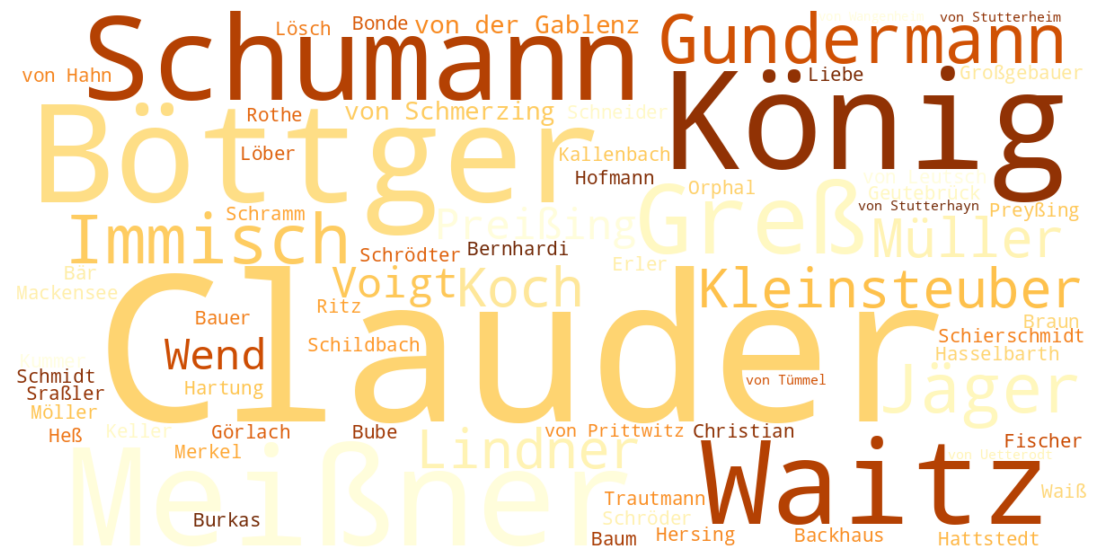

In [7]:
import requests
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import display, HTML

def load_google_font():
    """Bindet die Google-Font 'Inter' ins Notebook ein."""
    display(HTML("""
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Inter:wght@400;600&display=swap" rel="stylesheet">
    """))

def fetch_sparql_data():
    """Führt die SPARQL-Abfrage aus und gibt die Ergebnisse zurück."""
    sparql_endpoint = "https://database.factgrid.de/sparql"
    
    sparql_query = """
    SELECT DISTINCT ?person ?personLabel ?orga ?orgaLabel ?nameLabel
    WHERE {
      ?orga (wdt:P428)* ?jager.
      FILTER (?jager = wd:Q1013454 || ?jager = wd:Q506794 || ?jager = wd:Q1013848)
      ?person wdt:P315 ?orga.
      ?person wdt:P247 ?name

      # Labels für bessere Lesbarkeit
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en,de". }
    }
    GROUP BY ?person ?personLabel ?orga ?orgaLabel ?nameLabel
    ORDER BY ?nameLabel
    """
    
    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    
    return results

def process_data(results):
    """Verarbeitet die SPARQL-Daten und gibt eine Häufigkeitstabelle der Namen zurück."""
    unique_persons = set()
    name_labels = []

    for result in results["results"]["bindings"]:
        person = result["person"]["value"]
        name_label = result.get("nameLabel", {}).get("value", "")

        if person not in unique_persons and name_label:
            unique_persons.add(person)
            name_labels.append(name_label)

    return Counter(name_labels)

def create_wordcloud(word_freq):
    """Erstellt eine Wordcloud basierend auf den Namenshäufigkeiten."""
    plt.rcParams["font.family"] = "Inter"  # Schriftart setzen

    wordcloud = WordCloud(
        width=1200, height=600, background_color="white",
        colormap="YlOrBr", prefer_horizontal=1,
        max_words=100, contour_color='black', contour_width=1,
        normalize_plurals=True
    ).generate_from_frequencies(word_freq)

    plt.figure(figsize=(14, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def main():
    """Hauptfunktion, die alle Schritte ausführt."""
    load_google_font()  # Google Fonts laden
    results = fetch_sparql_data()  # Daten abrufen
    word_freq = process_data(results)  # Daten verarbeiten
    create_wordcloud(word_freq)  # Wordcloud erstellen

if __name__ == "__main__":
    main()


## Über den Amtskalender hinaus

Die bisherigen Analysen stellten vor allen Dingen zur Schau, was mit den erhobenen und zusätzlichen Daten in FactGrid für Fragen gestelltund beantwortet werden können. Diese letzte Abfrage zeigt nun, das enorme Potential, wenn Forschungsdaten einerseits mit Normdaten verküpft andererseits vorliegen. Im Projektdatensatz sind rund 300 Personen mit einer GND-Nummer verküpft und damit in vielen Portalen eindeutig identifizierbar. Das folgende Skript fragt zunächst alle Personen aus den Amtskalendern in den Jahren 1768–1779 und deren GND-Nummer ab. In einen zweiten Schritt werden die GND-Nummern für einen allgemeine Suche im Katalog des Verzeichnisses Deutscher Drucke des 18. Jahrhunderts (VD18) verwendet. Da der Katalog keine Schnittstelle wie eine API öffentlich zur Verfügung stellt, werden die Suchergebnisse zunächst über Webscraping – also das automatische Sammeln von Informationen aus Webseiten – abgerufen und angezeigt. Ein Ergebniss lässt zunächst nur darauf schließen, dass die gesuchte Person laut den Metadaten des Kataloges in irgendeiner Beziehung zu einem gefunden Werk steht; in der Regel handelt es sich aber um den Autor. 

> Technischer Hinweis: Die Skript benötigt nach Ausführung mitunter zwischen einer und zwei Minuten. Dies liegt vornehmlich an den Hardware-Kapazitäten von Deepnote, die in der kostenlosen Version beschränkt sind. Die Tabelle kann mit Klick auf die entsprechende Kopfzelle sortiert und durchsucht werden. 

In [3]:
import requests
from SPARQLWrapper import SPARQLWrapper, JSON
from bs4 import BeautifulSoup
import pandas as pd
import re
import concurrent.futures
from IPython.display import display, HTML

def fetch_and_display_data():
    # SPARQL-Abfrage zur Abholung der GND-Nummern vom FactGrid-Endpoint
    sparql = SPARQLWrapper("https://database.factgrid.de/sparql")
    query = """
    SELECT DISTINCT ?person ?personLabel ?GND WHERE{
        SERVICE wikibase:label { bd:serviceParam wikibase:language "de". }
        ?person wdt:P124 ?statement.
        ?statement p:P441 ?refStatement.
        ?refStatement ps:P441 wd:Q76826.
        FILTER(?statement != wd:Q76826)
        ?person wdt:P76 ?GND.
    }
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    # Extrahiere die Daten aus der Antwort
    data = []
    for result in results["results"]["bindings"]:
        person_url = result["person"]["value"]
        person_id = person_url.split("/")[-1]  # Extrahiere die Q-Nummer
        person_label = result.get("personLabel", {}).get("value", "")
        gnd = result.get("GND", {}).get("value", "")
        data.append([person_id, person_label, gnd])

    # Funktion zum Scrapen der Suchergebnisse
    def get_vd18_search_results(gnd):
        search_url = f"https://vd18.gbv.de/viewer/search/-/SUPERDEFAULT%25253A%252528{gnd}%252529%2BSUPERFULLTEXT%25253A%252528{gnd}%252529%2BSUPERUGCTERMS%25253A%252528{gnd}%252529%2BDEFAULT%25253A%252528{gnd}%252529%2BFULLTEXT%25253A%252528{gnd}%252529%2BNORMDATATERMS%25253A%252528{gnd}%252529%2BUGCTERMS%25253A%252528{gnd}%252529%2BCMS_TEXT_ALL%25253A%252528{gnd}%252529/1/-/-/"
        
        try:
            response = requests.get(search_url)
            response.raise_for_status()
        except requests.RequestException as e:
            print(f"Fehler beim Abrufen der URL {search_url}: {e}")
            return "Fehler", search_url
        
        soup = BeautifulSoup(response.text, 'html.parser')
        result_div = soup.find("div", class_="search-list__hitcount")
        
        if result_div:
            match = re.search(r"(\d+) Treffer", result_div.text)
            if match:
                return match.group(1), search_url
            elif "keine Treffer" in result_div.text:
                return "0", search_url
        return "Unbekannt", search_url

    # Parallelisieren des Scraping-Prozesses
    with concurrent.futures.ThreadPoolExecutor(max_workers=16) as executor:
        results = list(executor.map(lambda row: (row[0], row[1], row[2], *get_vd18_search_results(row[2])), data))

    # Ergebnisse als DataFrame darstellen
    df = pd.DataFrame(results, columns=["Person ID", "Person Label", "GND", "Trefferzahl", "Link in VD18"])
    df["Person ID"] = df.apply(lambda row: f'<a href="https://database.factgrid.de/entity/{row["Person ID"]}" target="_blank">{row["Person ID"]}</a>', axis=1)
    df["Link in VD18"] = df.apply(lambda row: f'<a href="{row["Link in VD18"]}" target="_blank">Link</a>', axis=1)
    
    # HTML-Tabelle mit DataTables für Such- und Sortierfunktion
    html_code = """
    <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.13.4/css/jquery.dataTables.min.css">
    <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
    <script src="https://cdn.datatables.net/1.13.4/js/jquery.dataTables.min.js"></script>
    <script>
    $(document).ready(function() {
        $('#sortableTable').DataTable();
    });
    </script>
    <style>
    body { font-family: 'Inter', sans-serif; }
    .scrollable-table { max-height: 400px; overflow-y: auto; border: 1px solid #ccc; padding: 10px; }
    table { width: 100%; border-collapse: collapse; }
    th, td { padding: 8px 12px; border: 1px solid #ddd; text-align: left; }
    th { background-color: #f4f4f4; font-weight: 600; cursor: pointer; }
    a { color: #007bff; text-decoration: none; }
    a:hover { text-decoration: underline; }
    </style>
    """
    table_html = df.to_html(classes="display", escape=False, index=False, table_id="sortableTable")
    display(HTML(html_code + table_html))

# Führe die gesamte Verarbeitung aus
fetch_and_display_data()

Person ID,Person Label,GND,Trefferzahl,Link in VD18
Q77402,Johann David Weidner,132955776,0,Link
Q78312,Johann Heinrich Stuß,117364746,45,Link
Q80505,August Kellner,130128511,0,Link
Q97505,Friedrich Carl von Rehboom,142587249,0,Link
Q98569,Wilhelm Gottlieb Jacobs,141905883,0,Link
Q99135,Heinrich Baltasar Preising,133666395,0,Link
Q99161,Georg Benda,118655329,22,Link
Q99134,Ludwig Ernst von Uetterodt,1140261509,0,Link
Q99153,Philipp Friedrich Welker,1183861745,0,Link
Q101872,Heinrich Ernst Gotter,103053506,2,Link


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edd1efe7-875f-48f1-96be-17c3306e8f2a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>